In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [2]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=31796aa84bcbb3cbeeb51914e16b61e6


In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Create a practice set of random latitude and longitude combinations.
x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
coordinates = zip(x, y)

In [5]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

25.12903645 -67.59741259
25.92017388 11.09532135
26.62509167 74.84233102
-59.98969384 -76.89176677
37.30571269 -61.13376282


In [6]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [7]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [8]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

shaoguan cn
vanavara ru
isangel vu
lagoa pt
qaanaaq gl
castro cl
longyearbyen sj
albany au
innisfail au
yellowknife ca
severo-kurilsk ru
bredasdorp za
busselton au
torbay ca
rio grande br
taolanaro mg
belushya guba ru
morehead pg
bredasdorp za
rikitea pf
houma us
abbotsford ca
new norfolk au
yanahuanca pe
naze jp
lebu cl
kapaa us
chokwe mz
hithadhoo mv
batagay ru
punta arenas cl
flin flon ca
avarua ck
grand river south east mu
luderitz na
bejar es
amderma ru
requena pe
dali cn
bowen au
lebu cl
butaritari ki
sao joao da barra br
naze jp
taolanaro mg
chapais ca
mehamn no
port keats au
coihaique cl
ushuaia ar
tasiilaq gl
sabang id
poya nc
hermanus za
tasiilaq gl
hithadhoo mv
taolanaro mg
busselton au
ilulissat gl
bluff nz
verkhoyansk ru
hithadhoo mv
saint-pierre pm
albany au
lagoa pt
henties bay na
mount isa au
kawalu id
bolungarvik is
souillac mu
hobart au
busselton au
iquique cl
atuona pf
mimongo ga
sandnessjoen no
ushuaia ar
lasa cn
christchurch nz
billings us
alofi nu
barra br
tieling

rikitea pf
harlingen nl
illoqqortoormiut gl
nizhneyansk ru
ushuaia ar
busselton au
punta arenas cl
alice springs au
avarua ck
arraial do cabo br
avarua ck
hermiston us
hilo us
bathsheba bb
bom jesus da lapa br
talaya ru
provideniya ru
vostok ru
forest lake us
bluff nz
atuona pf
vila velha br
cape town za
hilo us
tezu in
ushuaia ar
tongchuan cn
pong th
richards bay za
miranorte br
jamestown sh
kaspiyskiy ru
huangyan cn
hermanus za
ust-tsilma ru
tanout ne
faanui pf
avarua ck
hare bay ca
cabo san lucas mx
shelburne ca
korla cn
inhambane mz
vaini to
montoro es
mataura pf
miquelon pm
yellowknife ca
punta arenas cl
bethel us
hobart au
cape town za
bethel us
castro cl
terney ru
bengkulu id
lebu cl
cape town za
bambous virieux mu
tessalit ml
zunyi cn
mar del plata ar
cape town za
hermanus za
tumannyy ru
kaitangata nz
kaitangata nz
norman wells ca
avarua ck
anchorage us
ushuaia ar
new norfolk au
longyearbyen sj
mataura pf
vanimo pg
the valley ai
esperance au
kodiak us
egvekinot ru
hithadhoo mv


In [9]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

609

In [10]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
    # Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 13 | shaoguan
Processing Record 2 of Set 13 | vanavara
Processing Record 3 of Set 13 | isangel
Processing Record 4 of Set 13 | lagoa
Processing Record 5 of Set 13 | qaanaaq
Processing Record 6 of Set 13 | castro
Processing Record 7 of Set 13 | longyearbyen
Processing Record 8 of Set 13 | albany
Processing Record 9 of Set 13 | innisfail
Processing Record 10 of Set 13 | yellowknife
Processing Record 11 of Set 13 | severo-kurilsk
Processing Record 12 of Set 13 | bredasdorp
Processing Record 13 of Set 13 | busselton
Processing Record 14 of Set 13 | torbay
Processing Record 15 of Set 13 | rio grande
Processing Record 16 of Set 13 | taolanaro
City not found. Skipping...
Processing Record 17 of Set 13 | belushya guba
City not found. Skipping...
Processing Record 18 of Set 13 | morehead
Processing Record 19 of Set 13 | rikitea
Processing Record 20 of Set 13 | houma
Processing Record 21 of Set 13 | abbotsford

Processing Record 35 of Set 16 | victoria
Processing Record 36 of Set 16 | narsaq
Processing Record 37 of Set 16 | nouadhibou
Processing Record 38 of Set 16 | ostrovnoy
Processing Record 39 of Set 16 | krasnoselkup
Processing Record 40 of Set 16 | shenkursk
Processing Record 41 of Set 16 | azimur
City not found. Skipping...
Processing Record 42 of Set 16 | elin pelin
Processing Record 43 of Set 16 | barrow
Processing Record 44 of Set 16 | kungurtug
Processing Record 45 of Set 16 | marawi
Processing Record 46 of Set 16 | tiksi
Processing Record 47 of Set 16 | sitka
Processing Record 48 of Set 16 | airai
Processing Record 49 of Set 16 | kozmodemyansk
Processing Record 50 of Set 16 | vestmanna
Processing Record 1 of Set 17 | sakakah
Processing Record 2 of Set 17 | yangambi
Processing Record 3 of Set 17 | tabuk
Processing Record 4 of Set 17 | guerrero negro
Processing Record 5 of Set 17 | komsomolskiy
Processing Record 6 of Set 17 | tuktoyaktuk
Processing Record 7 of Set 17 | lukovetskiy
P

Processing Record 21 of Set 20 | ponazyrevo
Processing Record 22 of Set 20 | beaverlodge
Processing Record 23 of Set 20 | port hardy
Processing Record 24 of Set 20 | tarabha
Processing Record 25 of Set 20 | wanxian
Processing Record 26 of Set 20 | cap malheureux
Processing Record 27 of Set 20 | yerkoy
Processing Record 28 of Set 20 | saint-augustin
Processing Record 29 of Set 20 | arawa
Processing Record 30 of Set 20 | moose factory
Processing Record 31 of Set 20 | warmbad
Processing Record 32 of Set 20 | patiya
Processing Record 33 of Set 20 | maunabo
Processing Record 34 of Set 20 | orlik
Processing Record 35 of Set 20 | padang
Processing Record 36 of Set 20 | nhulunbuy
Processing Record 37 of Set 20 | gisborne
Processing Record 38 of Set 20 | skalistyy
City not found. Skipping...
Processing Record 39 of Set 20 | nichinan
Processing Record 40 of Set 20 | montlucon
Processing Record 41 of Set 20 | mitrofanovka
Processing Record 42 of Set 20 | miles city
Processing Record 43 of Set 20 

Processing Record 6 of Set 24 | san joaquin
Processing Record 7 of Set 24 | sao miguel do tapuio
Processing Record 8 of Set 24 | umzimvubu
City not found. Skipping...
Processing Record 9 of Set 24 | noumea
Processing Record 10 of Set 24 | qeshm
Processing Record 11 of Set 24 | varhaug
Processing Record 12 of Set 24 | moerai
Processing Record 13 of Set 24 | pervomayskoye
Processing Record 14 of Set 24 | bur gabo
City not found. Skipping...
Processing Record 15 of Set 24 | brae
Processing Record 16 of Set 24 | bastia
Processing Record 17 of Set 24 | babstovo
Processing Record 18 of Set 24 | aklavik
Processing Record 19 of Set 24 | baoning
Processing Record 20 of Set 24 | balkhash
Processing Record 21 of Set 24 | ukiah
Processing Record 22 of Set 24 | bambanglipuro
Processing Record 23 of Set 24 | patacamaya
Processing Record 24 of Set 24 | laiagam
City not found. Skipping...
Processing Record 25 of Set 24 | belle fourche
Processing Record 26 of Set 24 | linshu
City not found. Skipping...

In [11]:
city_data

[{'City': 'Shaoguan',
  'Lat': 24.8,
  'Lng': 113.5833,
  'Max Temp': 67.78,
  'Humidity': 63,
  'Cloudiness': 0,
  'Wind Speed': 1.43,
  'Country': 'CN',
  'Date': '2022-04-09 17:28:49'},
 {'City': 'Vanavara',
  'Lat': 60.34,
  'Lng': 102.2797,
  'Max Temp': 14.43,
  'Humidity': 98,
  'Cloudiness': 91,
  'Wind Speed': 3.11,
  'Country': 'RU',
  'Date': '2022-04-09 17:28:50'},
 {'City': 'Isangel',
  'Lat': -19.55,
  'Lng': 169.2667,
  'Max Temp': 80.29,
  'Humidity': 84,
  'Cloudiness': 100,
  'Wind Speed': 10,
  'Country': 'VU',
  'Date': '2022-04-09 17:28:50'},
 {'City': 'Lagoa',
  'Lat': 39.05,
  'Lng': -27.9833,
  'Max Temp': 55.96,
  'Humidity': 67,
  'Cloudiness': 99,
  'Wind Speed': 36.55,
  'Country': 'PT',
  'Date': '2022-04-09 17:28:51'},
 {'City': 'Qaanaaq',
  'Lat': 77.484,
  'Lng': -69.3632,
  'Max Temp': -0.56,
  'Humidity': 71,
  'Cloudiness': 11,
  'Wind Speed': 4.43,
  'Country': 'GL',
  'Date': '2022-04-09 17:28:51'},
 {'City': 'Castro',
  'Lat': -24.7911,
  'Lng': -5

In [20]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Shaoguan,24.8000,113.5833,67.78,63,0,1.43,CN,2022-04-09 17:28:49
1,Vanavara,60.3400,102.2797,14.43,98,91,3.11,RU,2022-04-09 17:28:50
2,Isangel,-19.5500,169.2667,80.29,84,100,10.00,VU,2022-04-09 17:28:50
3,Lagoa,39.0500,-27.9833,55.96,67,99,36.55,PT,2022-04-09 17:28:51
4,Qaanaaq,77.4840,-69.3632,-0.56,71,11,4.43,GL,2022-04-09 17:28:51
5,Castro,-24.7911,-50.0119,78.48,56,66,6.89,BR,2022-04-09 17:28:52
6,Longyearbyen,78.2186,15.6401,22.84,68,20,14.97,SJ,2022-04-09 17:28:52
7,Albany,42.6001,-73.9662,45.37,88,100,1.99,US,2022-04-09 17:28:52
8,Innisfail,-17.5333,146.0333,73.83,93,79,5.59,AU,2022-04-09 17:28:53
9,Yellowknife,62.4560,-114.3525,24.42,73,20,24.16,CA,2022-04-09 17:28:53


In [21]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Shaoguan,CN,2022-04-09 17:28:49,24.800,113.5833,67.78,63,0,1.43
1,Vanavara,RU,2022-04-09 17:28:50,60.340,102.2797,14.43,98,91,3.11
2,Isangel,VU,2022-04-09 17:28:50,-19.550,169.2667,80.29,84,100,10.00
3,Lagoa,PT,2022-04-09 17:28:51,39.050,-27.9833,55.96,67,99,36.55
4,Qaanaaq,GL,2022-04-09 17:28:51,77.484,-69.3632,-0.56,71,11,4.43


In [22]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [23]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [24]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1649526547.6604218

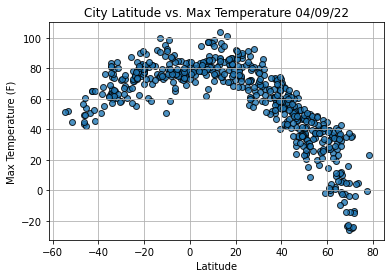

In [25]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

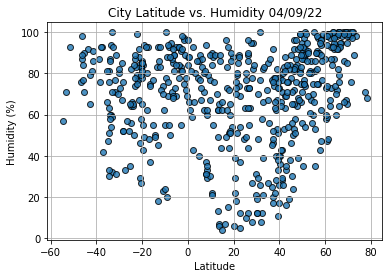

In [26]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

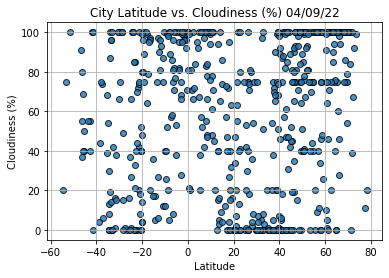

In [27]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

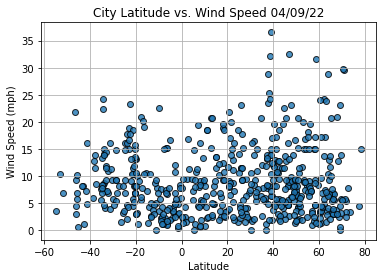

In [28]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [29]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [30]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Shaoguan,CN,2022-04-09 17:28:49,24.8000,113.5833,67.78,63,0,1.43
1,Vanavara,RU,2022-04-09 17:28:50,60.3400,102.2797,14.43,98,91,3.11
3,Lagoa,PT,2022-04-09 17:28:51,39.0500,-27.9833,55.96,67,99,36.55
4,Qaanaaq,GL,2022-04-09 17:28:51,77.4840,-69.3632,-0.56,71,11,4.43
6,Longyearbyen,SJ,2022-04-09 17:28:52,78.2186,15.6401,22.84,68,20,14.97
...,...,...,...,...,...,...,...,...,...
554,Turka,UA,2022-04-09 17:46:07,49.1541,23.0297,35.80,99,100,2.75
556,Katangli,RU,2022-04-09 17:46:08,51.7102,143.2326,15.26,99,92,5.91
557,Praia Da Vitoria,PT,2022-04-09 17:44:23,38.7333,-27.0667,58.75,82,20,24.23
558,Mount Pleasant,US,2022-04-09 17:46:09,32.7941,-79.8626,57.99,39,100,14.97


In [31]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Shaoguan,CN,2022-04-09 17:28:49,24.8000,113.5833,67.78,63,0,1.43
1,Vanavara,RU,2022-04-09 17:28:50,60.3400,102.2797,14.43,98,91,3.11
3,Lagoa,PT,2022-04-09 17:28:51,39.0500,-27.9833,55.96,67,99,36.55
4,Qaanaaq,GL,2022-04-09 17:28:51,77.4840,-69.3632,-0.56,71,11,4.43
6,Longyearbyen,SJ,2022-04-09 17:28:52,78.2186,15.6401,22.84,68,20,14.97


In [32]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [50]:
southern_hemi_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Isangel,VU,2022-04-09 17:28:50,-19.5500,169.2667,80.29,84,100,10.00
5,Castro,BR,2022-04-09 17:28:52,-24.7911,-50.0119,78.48,56,66,6.89
8,Innisfail,AU,2022-04-09 17:28:53,-17.5333,146.0333,73.83,93,79,5.59
11,Bredasdorp,ZA,2022-04-09 17:28:54,-34.5322,20.0403,61.68,81,13,22.30
12,Busselton,AU,2022-04-09 17:28:54,-33.6500,115.3333,60.01,60,96,7.23
...,...,...,...,...,...,...,...,...,...
540,Imbituba,BR,2022-04-09 17:45:00,-28.2400,-48.6703,75.33,76,49,6.91
544,Yulara,AU,2022-04-09 17:45:02,-25.2406,130.9889,57.04,35,0,3.44
550,Valparaiso,CL,2022-04-09 17:45:05,-33.0393,-71.6273,65.84,71,0,9.22
555,Panguna,PG,2022-04-09 17:46:08,-6.3164,155.4848,66.92,92,81,1.70


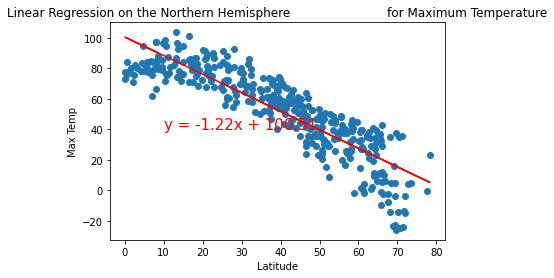

In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

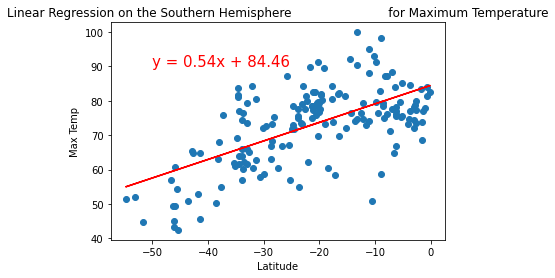

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))


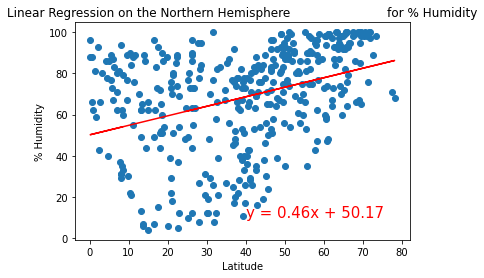

In [36]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

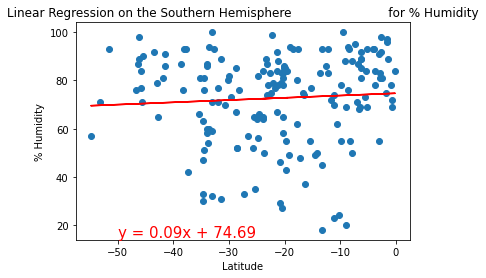

In [37]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

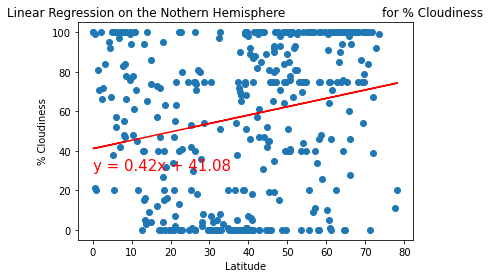

In [51]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Nothern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(0,30))

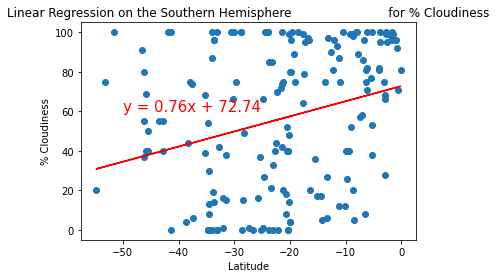

In [52]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

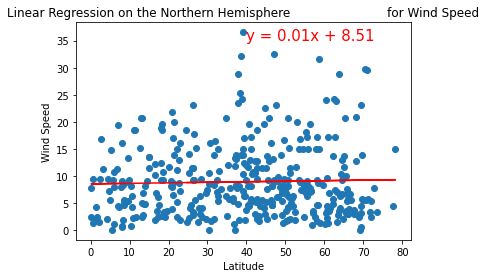

In [56]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

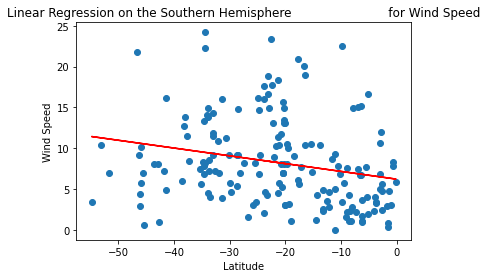

In [58]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))